In [72]:
import time

import matplotlib.pyplot as plt
import numpy as np

# Part 1


In [73]:
class Object:
    def __init__(self, weight, value):
        self.weight = weight
        self.value = value

    def __str__(self) -> str:
        return f"{self.weight=}, {self.value=}"


class Bag:
    def __init__(self, max_weight):
        self.max_weight = max_weight
        self.total_weight = 0
        self.total_value = 0
        self.objects = []

    def __str__(self) -> str:
        objects_str = ", ".join([str(obj) for obj in self.objects])

        return (
            f"{self.max_weight=}, {self.total_weight=}, "
            f"{self.total_value=}, objects=[{objects_str}])"
        )

    def add_object(self, obj: Object) -> None:
        if self.is_addable(obj):
            self.objects.append(obj)
            self.total_weight += obj.weight
            self.total_value += obj.value

    def is_addable(self, obj: Object) -> bool:
        remaining_weight = self.max_weight - self.total_weight
        return obj.weight <= remaining_weight

    def reset(self) -> None:
        self.objects = []
        self.total_weight = 0
        self.total_value = 0

In [74]:
bag = Bag(max_weight=100)
obj_list = [
    Object(weight=np.random.randint(1, 200), value=np.random.randint(1, 100))
    for _ in range(20)
]

In [75]:
def rank_objects(obj_list: list[Object]) -> list[Object]:
    res = []
    for i in range(len(obj_list)):
        res.append((obj_list[i].value / obj_list[i].weight, i, obj_list[i]))

    return sorted(res, reverse=True)

In [76]:
def glouton(bag: Bag, obj_list: list[Object]) -> None:
    ranked_obj = rank_objects(obj_list)
    for _, _, obj in ranked_obj:
        bag.add_object(obj)

        if bag.total_weight >= bag.max_weight:
            return

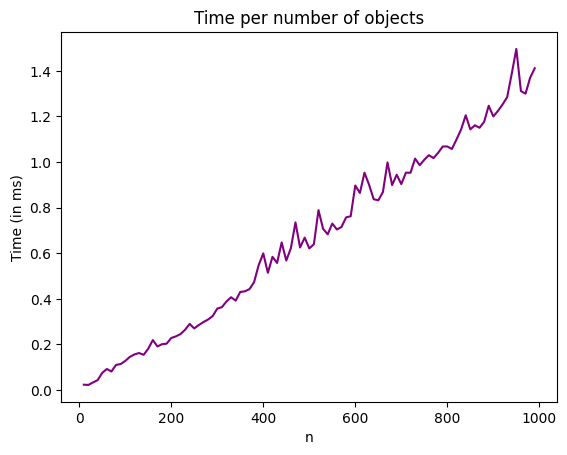

In [77]:
max_object_weight = 10

times = []
ns = list(range(10, 1000, 10))

for n in ns:
    bag = Bag(max_weight=max_object_weight * n)
    obj_list = [
        Object(
            weight=np.random.randint(1, max_object_weight),
            value=np.random.randint(1, 100),
        )
        for _ in range(n)
    ]

    start = time.time()

    for _ in range(5):
        glouton(bag, obj_list)

    times.append((time.time() - start) * 1000)


plt.plot(
    ns,
    times,
    color="purple",
)
plt.xlabel("n")
plt.ylabel("Time (in ms)")
plt.title("Time per number of objects")
plt.show()

# Part 2


In [78]:
# TODO find a better function name
def make_tree(bag: Bag, objects: list[Object]):
    n = len(objects)
    best_solution = 0
    stack = [(0, 0, 0)]  # (level, current_weight, current_value)

    max_weight = bag.max_weight

    node_count = 1
    leaf_count = 0

    while stack:
        node_count += 1
        level, current_weight, current_value = stack.pop()

        # Out of capacity
        if current_weight > max_weight:
            continue

        best_solution = max(best_solution, current_value)

        # Leaf reached
        if level == n:
            leaf_count += 1
            continue

        object = objects[level]

        stack.append(
            (level + 1, current_weight, current_value)
        )  # Right node: don't include next object

        stack.append(
            (level + 1, current_weight + object.weight, current_value + object.value)
        )  # Left node: include next object

    print(f"{node_count=}, {leaf_count=}")
    return best_solution

In [79]:
objects = [
    Object(weight=1, value=2),
    Object(weight=2, value=3),
    Object(weight=3, value=4),
]
bag = Bag(max_weight=4)

best_solution = make_tree(bag, objects)
print(f"{best_solution=}")

node_count=16, leaf_count=6
best_solution=6
